In [1]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot as plt

In [1]:
def labelling(expectedDir):
    '''
    For user input-path for directory to label the datasets.

    Parameters
    ---------------
    expectedDir: str.
        user input for directory.

    Returns
    ---------------
    transformed datasets with labels.
    '''

    files = [os.path.basename(x) for x in glob.glob(expectedDir + '*.csv')]
    for i in files:
        df = pd.read_csv(i,
                         names=['X', 'Y', 'W', 'H'])
        df.insert(loc=0,
                  column='labels',
                  value=0)
        df.to_csv(i, header=False, index=False, sep=' ')
    



In [3]:
expectedDir = './acds_project/datasets/mars/labels/val2023/'

labelling(expectedDir)

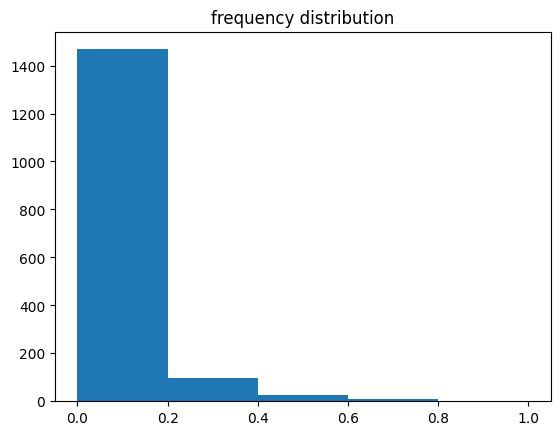

In [9]:
def ploting_freq_and_scaling(expectedDir,Dir1,Dir2,Dir3):
    '''
    For user input-path for directory to plot frequency of size of objects and scale them using three domains.

    Parameters
    ---------------
    expectedDir: str.
        user input for directory.
    Dir1: str.
        path for small object.
    Dir2: str.
        path for medium object.
    Dir3: str.
        path for large object.

    Returns
    ---------------
    frequency distribution histogram and scaled dataset.
    '''
    
    # plot frequency
    files = [os.path.basename(x) for x in glob.glob(expectedDir + '*.csv')]
    freq = []
    for i in files:
        df = pd.read_csv(i,
                     names=['labels', 'X', 'Y', 'W', 'H'],
                     delimiter=' ',)
        for j in df.index:
            freq.append((df.loc[j, 'W'] + df.loc[j, 'H'])/2)
            
        freq = np.array(freq)
        plt.hist(freq, bins=[0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.title("frequency distribution")
        plt.show()

    # scale datasets
    for i in files[:]:
        df = pd.read_csv(i,
                     names=['labels', 'X', 'Y', 'W', 'H'],
                     delimiter=' ',)
        dfs = df.copy()
        dfm = df.copy()
        dfl = df.copy()
        for j in df.index:
            if ((df.loc[j, 'W'] + df.loc[j, 'H'])/2) >= 0.1:
                dfs = dfs.drop(j)
            if ((df.loc[j, 'W'] + df.loc[j, 'H'])/2) < 0.1 or ((df.loc[j, 'W'] + df.loc[j, 'H'])/2) > 0.3:
                dfm = dfm.drop(j)
            if ((df.loc[j, 'W'] + df.loc[j, 'H'])/2) <= 0.3:
                dfl = dfl.drop(j)

        dfs.to_csv(Dir1 +
               i, header=False, index=False, sep=' ')
        dfm.to_csv(Dir2 +
               i, header=False, index=False, sep=' ')
        dfl.to_csv(Dir3 +
               i, header=False, index=False, sep=' ')


In [ ]:
expectedDir = './acds_project/datasets/mars/labels/val2023/'
Dir1 = './acds_project/datasets/mars/labels/vals2023/'
Dir2 = './acds_project/datasets/mars/labels/valm2023/'
Dir3 = './acds_project/datasets/mars/labels/vall2023/'

ploting_freq_and_scaling(expectedDir,Dir1,Dir2,Dir3)
